# Using Finta for Trading Signals

In this activity, you will be utilizing the [finta Python library](https://pypi.org/project/finta/) to generate the trading signals that power your trading algorithms.

## Instructions

In this activity, you will be utilizing the [finta Python library](https://pypi.org/project/finta/) to generate the trading signals that power your trading algorithms.

1. Open a new terminal window and install the [finta Python library](https://pypi.org/project/finta/).

  * Activate your conda `dev` virtual environment.
  * Type the following at the command prompt:

    ```shell
    pip install finta
    ```

2. Using the Jupyter notebook included in the unsolved folder, import the TA module from the finta library.

3. Read in the `ixn_ohlcv.csv`file from the Resources folder into a Pandas DataFrame. Both review the DataFrame and generate a plot of the "close" price using hvPlot.

### Part 1: Recreate the DMAC trading algorithm using technical indicators from the finta library.

Using the [finta library](https://pypi.org/project/finta/), reconstruct the simple moving average (`TA.SMA`) dual crossover trading algorithm.

1. Set a `short_window` variable at 15, and a `long_window` variable at 50.

2.  Using the [finta library](https://pypi.org/project/finta/) syntax, create two DataFrame columns. One column holds the "Short" simple moving average calculation, the other holds the "Long" simple moving average value calculation. Review the DataFrame to confirm the new columns were added.

3. Create a "Signal" column for the DataFrame and set the initial value to 0.

4. Create the trading algorithm using the `np.where` function. The value of the "Signal" column should updated to 1 where the short value SMA is greater than the long value SMA and 0 otherwise.

5. Create an "Entry/Exit" column in the DataFrame using the `diff` function. The column should reflect a 1 where the "Signal" column changes from 0 to 1, and a -1 where the "Signal" column changes from 1 to 0. Again, review the updated DataFrame.

6. Review the visualization that plots the entry points, exit point, short and long-window moving averages, all against the closing price.

7. Update the trading algorithm by incorporating at least one new moving average technical indicator (ie. SSM,  SSMA, EMA, DEMA, etc.) into your algorithm and evaluate the results.

### Part 2: Create a new trading algorithm using the Bollinger Bands technical indicator from the finta library.

Using the [finta library](https://pypi.org/project/finta/), construct a trading algorithm where an entry position is initiated when the closing price is less than the lower Bollinger band (an indicator that the stock is oversold and the price is likely to trend higher), and an exit position is initiated when the closing price is greater than the upper Bollinger band (an indicator that the stock is overbought and the price is likely to trend lower).

1. Create a copy of the original `ixn_df` DataFrame and save it as a DataFrame called `bb_signals_df`. Review the DataFrame.

2. Create a DataFrame called `bbands_df` by using the finta library's syntax to create the Bollinger Bands technical indicator. Review the DataFrame.

3. Using the [Pandas `concat` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html), concatenate the `bb_signals_df` and the `bbands_df` DataFrames. Save them as a new version of the `bb_signals_df`. Review the concatenated DataFrame.

4. Review the visualization of the `bb_signals_df` DataFrame including the Bollinger bands.

5. Create a trading algorithm that incorporates the Bollinger bands technical indicator.

    * Create a "Signal" column for the `bb_signals_df` DataFrame. Set the initial value to 0.
    * Create a trading algorithm using the Pandas `iterrows` function. For each row, if the "close" is less than "BB_LOWER", indicating an oversold position, update the "Signal" column to a 1 (trade entry). If the "close" value is greater than "BB_UPPER", indicating an overbought position, update the "Signal" column to -1 (trade exit).
    * Review the DataFrame.

6. Review the visualization that overlays the entry and exit positions as well as the close value and each of the 3 Bollinger bands. What do you notice about the entry and exit positions? Would this make a viable trading algorithm given its current status?

7. Update the trading algorithm so that only the first entry and first exit positions for each trade cycle are identified as trading signals. Review the plot to see if the variable was incorporated correctly.

    * **Hint:** Create a variable called `trading signal`, which is initially assigned a value of 0. This trading signal should be incorporated as a conditional in the trading algorithm's if-statement. The value should be adjusted to either 1 or 0 when the "Signal" column is updated. Review the plot to see if the variable was incorporated correctly.


In [1]:
# Import
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path

# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

## Import the finta Python library

In [2]:
# Import the finta Python library and the TA module
from finta import TA

## Import the CSV file and create the Pandas DataFrame

In [3]:
# Read in CSV file in from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
btc_df = pd.read_csv(
    Path("btc_historic.csv"),
    index_col = "Date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Review the DataFrame
btc_df.tail()

Open          High          Low        Close    Adj Close     Volume
Date                                                                                   
2019-07-25  9772.139648  10184.429688  9744.700195  9882.429688  9882.429688  403576364
2019-07-26  9882.429688   9890.049805  9668.519531  9847.450195  9847.450195  312717110
2019-07-27  9847.450195  10202.950195  9310.469727  9478.320313  9478.320313  512612117
2019-07-28  9478.320313   9591.519531  9135.639648  9531.769531  9531.769531  267243770
2019-07-29  9531.730469   9717.690430  9386.900391  9529.889648  9529.889648  277409600

In [4]:
# Plot the DataFrame with hvplot
btc_df["Close"].hvplot()

:Curve   [Date]   (Close)

---

## Part 1: 

### Recreate the DMAC trading algorithm using technical indicators from the finta library.

In [5]:
# Create a signals_df DataFrame that is a copy of the ixn_df Dataframe
signals_df = btc_df.copy()

# Set the short window and long windows
short_window = 15
long_window = 50

# Add the SMA technical indicators for the short and long windows
signals_df["Short"] = TA.SMA(signals_df, short_window)
signals_df["Long"] = TA.SMA(signals_df, long_window)

# # Replace the SMA moving average calculations with an alternative moving average 
# # calculation from the finta library
# signals_df["Short"] = TA.DEMA(signals_df, short_window)
# signals_df["Long"] = TA.DEMA(signals_df, long_window)

# Review the DataFrame
signals_df.iloc[95:105, :]

Open         High          Low        Close    Adj Close      Volume        Short         Long
Date                                                                                                             
2018-04-07  6634.859863  7083.850098  6624.470215  6917.200195  6917.200195   564883141  7356.550618  9052.442432
2018-04-08  6917.200195  7132.029785  6911.020020  7049.919922  7049.919922   425825572  7256.674642  8971.496631
2018-04-09  7049.919922  7204.279785  6633.689941  6789.529785  6789.529785   901883664  7144.453971  8898.942617
2018-04-10  6789.529785  6922.839844  6676.720215  6871.069824  6871.069824   424510977  7059.045280  8812.718408
2018-04-11  6871.069824  6999.370117  6839.160156  6977.129883  6977.129883   450141340  7003.621940  8727.132412
2018-04-12  6977.040039  8051.950195  6791.330078  7927.729980  7927.729980  1490759969  7001.485286  8676.053809
2018-04-13  7927.729980  8237.160156  7758.799805  7899.109863  7899.109863  1171435820  7054.317936  8637.076807
2018-04-14  7898.740234  8195.339844  7841.189941  8022.509766  8022.509766   537286381  7132.234603  8594.016807
2018-04-15  8022.509766  8437.030273  8021.040039  8376.730469  8376.730469   570527804  7227.765299  8567.436807
2018-04-16  8376.730469  8430.929688  7929.240234  8079.770020  8079.770020   713471956  7310.693978  8536.830000

In [6]:
# Set the Signal column
signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["Signal"][short_window:] = np.where(
    signals_df["Short"][short_window:] > signals_df["Long"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["Entry/Exit"] = signals_df["Signal"].diff()

# Review the DataFrame
signals_df.iloc[95:105, :]

/opt/anaconda3/envs/pyviz0724/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Open         High          Low        Close    Adj Close      Volume        Short         Long  Signal  Entry/Exit
Date                                                                                                                                 
2018-04-07  6634.859863  7083.850098  6624.470215  6917.200195  6917.200195   564883141  7356.550618  9052.442432     0.0         0.0
2018-04-08  6917.200195  7132.029785  6911.020020  7049.919922  7049.919922   425825572  7256.674642  8971.496631     0.0         0.0
2018-04-09  7049.919922  7204.279785  6633.689941  6789.529785  6789.529785   901883664  7144.453971  8898.942617     0.0         0.0
2018-04-10  6789.529785  6922.839844  6676.720215  6871.069824  6871.069824   424510977  7059.045280  8812.718408     0.0         0.0
2018-04-11  6871.069824  6999.370117  6839.160156  6977.129883  6977.129883   450141340  7003.621940  8727.132412     0.0         0.0
2018-04-12  6977.040039  8051.950195  6791.330078  7927.729980  7927.729980  1490759969  7001.485286  8676.053809     0.0         0.0
2018-04-13  7927.729980  8237.160156  7758.799805  7899.109863  7899.109863  1171435820  7054.317936  8637.076807     0.0         0.0
2018-04-14  7898.740234  8195.339844  7841.189941  8022.509766  8022.509766   537286381  7132.234603  8594.016807     0.0         0.0
2018-04-15  8022.509766  8437.030273  8021.040039  8376.730469  8376.730469   570527804  7227.765299  8567.436807     0.0         0.0
2018-04-16  8376.730469  8430.929688  7929.240234  8079.770020  8079.770020   713471956  7310.693978  8536.830000     0.0         0.0

In [7]:
# Visualize entry position relative to close price
entry = signals_df[signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = signals_df[signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = signals_df[["Short", "Long"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

---

## Part 2: 

### Create a new trading algorithm using the Bollinger Bands technical indicator from the finta library. 

In [8]:
# Create a new clean copy of the signals_df DataFrame
bb_signals_df = btc_df.copy()

# Review the DataFrame
bb_signals_df.head()

Open          High           Low         Close     Adj Close      Volume
Date                                                                                        
2018-01-02  13444.879883  15306.129883  12934.160156  14754.129883  14754.129883  1956783037
2018-01-03  14754.089844  15435.009766  14579.709961  15156.620117  15156.620117  1604206990
2018-01-04  15156.490234  15408.660156  14244.669922  15180.080078  15180.080078  1656714736
2018-01-05  15180.080078  17126.949219  14832.360352  16954.779297  16954.779297  2283988962
2018-01-06  16954.759766  17252.849609  16286.570313  17172.300781  17172.300781  1412703790

In [9]:
# Determine the Bollinger Bands for the Dataset
bbands_df = TA.BBANDS(bb_signals_df)

# Review the DataFrame
bbands_df.iloc[17:25, :]

BB_UPPER     BB_MIDDLE      BB_LOWER
Date                                                
2018-01-19           NaN           NaN           NaN
2018-01-20           NaN           NaN           NaN
2018-01-21  17645.625219  13897.477539  10149.329859
2018-01-22  17666.819798  13700.497021   9734.174244
2018-01-23  17583.331218  13485.577539   9387.823860
2018-01-24  17412.558418  13298.024512   9183.490606
2018-01-25  16844.550427  13009.079053   9173.607679
2018-01-26  16087.717915  12705.674023   9323.630131

In [10]:
# Concatenate the Bollinger Bands to the DataFrame
bb_signals_df = pd.concat([bb_signals_df, bbands_df], axis=1)

# Review the DataFrame
bb_signals_df.iloc[17:25, :]

Open          High           Low         Close     Adj Close      Volume      BB_UPPER     BB_MIDDLE      BB_LOWER
Date                                                                                                                                  
2018-01-19  11175.519531  11780.490234  10867.179688  11521.759766  11521.759766  1264875700           NaN           NaN           NaN
2018-01-20  11521.820313  13031.040039  11502.110352  12783.940430  12783.940430  1492721765           NaN           NaN           NaN
2018-01-21  12783.540039  12787.349609  11101.730469  11549.929688  11549.929688  1552755289  17645.625219  13897.477539  10149.329859
2018-01-22  11549.980469  11913.740234  10067.759766  10814.519531  10814.519531  1811992345  17666.819798  13700.497021   9734.174244
2018-01-23  10814.519531  11388.519531   9980.500000  10858.230469  10858.230469  1710180828  17583.331218  13485.577539   9387.823860
2018-01-24  10853.780273  11531.599609  10506.549805  11429.019531  11429.019531  1286435482  17412.558418  13298.024512   9183.490606
2018-01-25  11428.110352  11741.919922  10930.339844  11175.870117  11175.870117  1061064251  16844.550427  13009.079053   9173.607679
2018-01-26  11175.870117  11656.540039  10346.860352  11104.200195  11104.200195  1560135332  16087.717915  12705.674023   9323.630131

In [11]:
# Visualize close price for the investment
security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower
bbands_plot

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

In [12]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
bb_signals_df["Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
for index, row in bb_signals_df.iterrows():
    if row["Close"] < row["BB_LOWER"]:
        bb_signals_df.loc[index, "Signal"] = 1.0
    if row["Close"] > row["BB_UPPER"]:
        bb_signals_df.loc[index,"Signal"] = -1.0

# Review the DataFrame
bb_signals_df.tail()

Open          High          Low        Close    Adj Close     Volume      BB_UPPER     BB_MIDDLE     BB_LOWER  Signal
Date                                                                                                                                    
2019-07-25  9772.139648  10184.429688  9744.700195  9882.429688  9882.429688  403576364  12666.545090  10835.812549  9005.080008     0.0
2019-07-26  9882.429688   9890.049805  9668.519531  9847.450195  9847.450195  312717110  12636.734930  10765.738037  8894.741144     0.0
2019-07-27  9847.450195  10202.950195  9310.469727  9478.320313  9478.320313  512612117  12589.982331  10665.940039  8741.897748     0.0
2019-07-28  9478.320313   9591.519531  9135.639648  9531.769531  9531.769531  267243770  12353.318685  10527.720508  8702.122331     0.0
2019-07-29  9531.730469   9717.690430  9386.900391  9529.889648  9529.889648  277409600  11978.924204  10375.864014  8772.803824     0.0

In [13]:
# Visualize entry position relative to close price
entry = bb_signals_df[bb_signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = bb_signals_df[bb_signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower * entry * exit
bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [14]:
# Update the trading algorithm using Bollinger Bands

# Set the Signal column
bb_signals_df["Signal"] = 0.0

# Create a value to hold the initial trade signal
trade_signal = 0

# Update the DataFrame Signal column 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
# Incorporate a conditional in the if-statement, to evaluate the value of the trade_signal so the algorithm 
# plots only 1 entry and exit point per cycle.
for index, row in bb_signals_df.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and (trade_signal < 1):
        bb_signals_df.loc[index, "Signal"] = 1.0
        trade_signal += 1
        
    if (row["Close"] > row["BB_UPPER"]) and (trade_signal > 0):
        bb_signals_df.loc[index, "Signal"] = -1.0
        trade_signal = 0


# Review the DataFrame
bb_signals_df

Open          High           Low         Close     Adj Close      Volume      BB_UPPER     BB_MIDDLE      BB_LOWER  Signal
Date                                                                                                                                          
2018-01-02  13444.879883  15306.129883  12934.160156  14754.129883  14754.129883  1956783037           NaN           NaN           NaN     0.0
2018-01-03  14754.089844  15435.009766  14579.709961  15156.620117  15156.620117  1604206990           NaN           NaN           NaN     0.0
2018-01-04  15156.490234  15408.660156  14244.669922  15180.080078  15180.080078  1656714736           NaN           NaN           NaN     0.0
2018-01-05  15180.080078  17126.949219  14832.360352  16954.779297  16954.779297  2283988962           NaN           NaN           NaN     0.0
2018-01-06  16954.759766  17252.849609  16286.570313  17172.300781  17172.300781  1412703790           NaN           NaN           NaN     0.0
2018-01-07  17174.500000  17184.810547  15791.129883  16228.160156  16228.160156  1309532650           NaN           NaN           NaN     0.0
2018-01-08  16228.259766  16302.919922  13902.309570  14976.169922  14976.169922  2166366561           NaN           NaN           NaN     0.0
2018-01-09  14976.169922  15390.280273  14221.549805  14468.500000  14468.500000  1486802326           NaN           NaN           NaN     0.0
2018-01-10  14468.089844  14919.490234  13450.540039  14919.490234  14919.490234  2025083791           NaN           NaN           NaN     0.0
2018-01-11  14920.360352  14979.959961  12825.950195  13308.059570  13308.059570  2373494121           NaN           NaN           NaN     0.0
2018-01-12  13308.059570  14129.080078  12851.910156  13841.190430  13841.190430  1402292716           NaN           NaN           NaN     0.0
2018-01-13  13841.190430  14595.040039  13830.280273  14243.120117  14243.120117  1021352776           NaN           NaN           NaN     0.0
2018-01-14  14244.120117  14415.669922  13031.910156  13638.629883  13638.629883  1112590573           NaN           NaN           NaN     0.0
2018-01-15  13638.629883  14355.820313  13416.709961  13631.980469  13631.980469  1170462750           NaN           NaN           NaN     0.0
2018-01-16  13634.599609  13648.839844  10032.690430  11282.490234  11282.490234  3842651741           NaN           NaN           NaN     0.0
2018-01-17  11282.490234  11736.299805   9205.379883  11162.700195  11162.700195  3666978316           NaN           NaN           NaN     0.0
2018-01-18  11162.700195  12018.429688  10642.330078  11175.519531  11175.519531  2357251805           NaN           NaN           NaN     0.0
2018-01-19  11175.519531  11780.490234  10867.179688  11521.759766  11521.759766  1264875700           NaN           NaN           NaN     0.0
2018-01-20  11521.820313  13031.040039  11502.110352  12783.940430  12783.940430  1492721765           NaN           NaN           NaN     0.0
2018-01-21  12783.540039  12787.349609  11101.730469  11549.929688  11549.929688  1552755289  17645.625219  13897.477539  10149.329859     0.0
2018-01-22  11549.980469  11913.740234  10067.759766  10814.519531  10814.519531  1811992345  17666.819798  13700.497021   9734.174244     0.0
2018-01-23  10814.519531  11388.519531   9980.500000  10858.230469  10858.230469  1710180828  17583.331218  13485.577539   9387.823860     0.0
2018-01-24  10853.780273  11531.599609  10506.549805  11429.019531  11429.019531  1286435482  17412.558418  13298.024512   9183.490606     0.0
2018-01-25  11428.110352  11741.919922  10930.339844  11175.870117  11175.870117  1061064251  16844.550427  13009.079053   9173.607679     0.0
2018-01-26  11175.870117  11656.540039  10346.860352  11104.200195  11104.200195  1560135332  16087.717915  12705.674023   9323.630131     0.0
2018-01-27  11104.339844  11638.690430  10879.200195  11459.709961  11459.709961  1031091633  15452.801317  12467.251514   9481.701710     0.0
2018-01-28  1146

In [15]:
# Visualize entry position relative to close price
entry = bb_signals_df[bb_signals_df["Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = bb_signals_df[bb_signals_df["Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower * entry * exit
bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)


        Fibonacci pivot point levels are determined by first calculating the classic pivot point,
        then multiply the previous day’s range with its corresponding Fibonacci level.
        Most traders use the 38.2%, 61.8% and 100% retracements in their calculations.
        

In [79]:
def PIVOT_FIB(cls, ohlc: btc_df) -> btc_df:
    

        btc_df = ohlc.shift()
        pp = pd.Series(cls.TP(btc_df), name="pivot")  # classic pivot

        r4 = pp + ((btc_df["high"] - btc_df["low"]) * 1.382)
        r3 = pp + ((btc_df["high"] - btc_df["low"]) * 1)
        r2 = pp + ((btc_df["high"] - btc_df["low"]) * 0.618)
        r1 = pp + ((btc_df["high"] - btc_df["low"]) * 0.382)

        s1 = pp - ((btc_df["high"] - btc_df["low"]) * 0.382)
        s2 = pp - ((btc_df["high"] - btc_df["low"]) * 0.618)
        s3 = pp - ((btc_df["high"] - btc_df["low"]) * 1)
        s4 = pp - ((btc_df["high"] - btc_df["low"]) * 1.382)

        return pd.concat(
            [
                pp,
                pd.Series(s1, name="s1"),
                pd.Series(s2, name="s2"),
                pd.Series(s3, name="s3"),
                pd.Series(s4, name="s4"),
                pd.Series(r1, name="r1"),
                pd.Series(r2, name="r2"),
                pd.Series(r3, name="r3"),
                pd.Series(r4, name="r4"),
            ],
            axis=1,
        )

In [80]:
# Create a signals_df DataFrame that is a copy of the ixn_df Dataframe
fig_signals_df = btc_df.copy()

# Set the short window and long windows
# short_window = 15
# long_window = 50

# Add the SMA technical indicators for the short and long windows
#signals_df["Short"] = TA.SMA(signals_df, short_window)
#signals_df["Long"] = TA.SMA(signals_df, long_window)

# # Replace the SMA moving average calculations with an alternative moving average 
# # calculation from the finta library
# signals_df["Short"] = TA.DEMA(signals_df, short_window)
# signals_df["Long"] = TA.DEMA(signals_df, long_window)

# Add the SMA technical indicators for
fig_signals_df = TA.PIVOT_FIB(fig_signals_df)

# Review the DataFrame
fig_signals_df.iloc[95:105, :]

pivot           s1           s2           s3           s4           r1           r2           r3           r4
Date                                                                                                                           
2018-04-07  6677.019857  6546.047389  6465.132461  6334.159994  6203.187526  6807.992324  6888.907252  7019.879720  7150.852187
2018-04-08  6875.173503  6699.690387  6591.276735  6415.793620  6240.310504  7050.656618  7159.070270  7334.553386  7510.036501
2018-04-09  7030.989909  6946.564179  6894.405874  6809.980144  6725.554414  7115.415639  7167.573944  7251.999674  7336.425404
2018-04-10  6875.833170  6657.867850  6523.208647  6305.243326  6087.278006  7093.798491  7228.457694  7446.423014  7664.388335
2018-04-11  6823.543294  6729.525596  6671.441364  6577.423665  6483.405967  6917.560993  6975.645225  7069.662923  7163.680622
2018-04-12  6938.553385  6877.353180  6839.543629  6778.343424  6717.143219  6999.753590  7037.563141  7098.763346  7159.963551
2018-04-13  7590.336751  7108.779866  6811.273519  6329.716634  5848.159749  8071.893636  8369.399983  8850.956868  9332.513753
2018-04-14  7965.023275  7782.289621  7669.396578  7486.662924  7303.929270  8147.756929  8260.649972  8443.383626  8626.117280
2018-04-15  8019.679850  7884.394587  7800.815210  7665.529947  7530.244684  8154.965113  8238.544490  8373.829753  8509.115016
2018-04-16  8278.266927  8119.358658  8021.184962  7862.276693  7703.368424  8437.175196  8535.348892  8694.257161  8853.165430

In [ ]:
# Set the Signal column
fig_signals_df["Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
signals_df["Signal"][short_window:] = np.where(
    signals_df["Short"][short_window:] > signals_df["Long"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["Entry/Exit"] = signals_df["Signal"].diff()

# Review the DataFrame
signals_df.iloc[95:105, :]

In [31]:
# importing mplfinance matplotlib utilities for the visualization, and visual analysis, of financial data,
import mplfinance as mpf

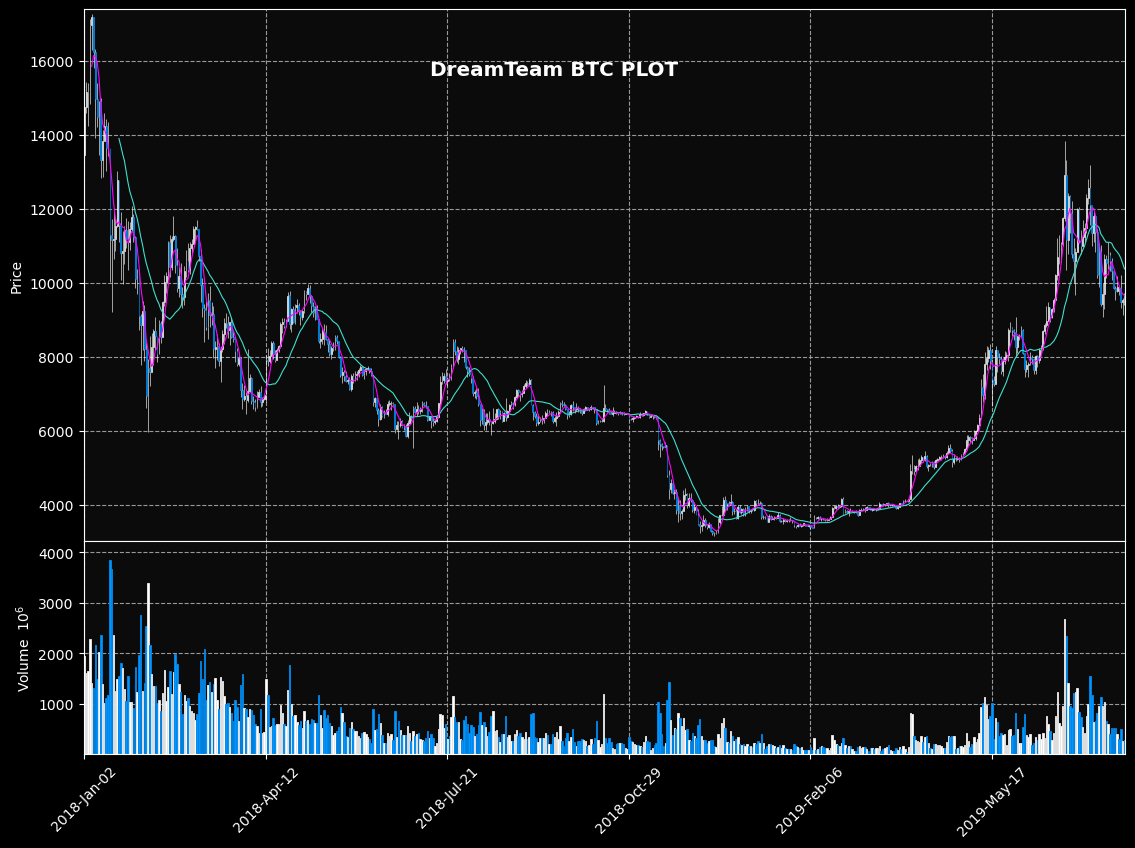

In [95]:
# Testing new plots
# Finta likes lowercase
btc_df.columns = ["open", "high", "low", "close","adj close", "volume"]

# calc Pivot Fib
# pfibs = TA.PIVOT_FIB(btc_df, 30)

# pick what to show on the chart
# pplot = fig_signals_df[['pivot','s1','r1']]
# apd = mpf.make_addplot(pplot)


mpf.plot(btc_df,type='candle', 
         title="DreamTeam BTC PLOT", 
         volume=True, 
         figscale=1.5,
         style='nightclouds', 
         mav=(20,5), 
         tight_layout=True,
         # addplot=apdict
     )